<a href="https://colab.research.google.com/github/zar55/COSC_635_Reinforcement_Learning/blob/main/Lab_04_zziauddin1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COSC-635: Lab 4

**Zargham Ziauddin**


## Getting Started

Follow the instructions below to set copy this notebook and to perform some initial setup.

1. Copy this notebook by selecting `File > Save a copy in Drive`.
2. A new window should open for the copied notebook. Move the new notebook to your course folder in Google Drive by selecting `File > Move` and then selecting the desired folder.
3. Update the name of the notebook by removing "Copy of" and replacing "Username" with your actual username.
4. Update the first cell in the notebook by specifying your course number (435 or 635) and by replacing "Student Name" with your actual name.
5. Mount your Google Drive by running the cell below and accepting the prompts you are presented with.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Preparing the Colab Environment

Run the cell below to install gymnasium and to download rltools to the virtual machine. This cell will also download csv files for two datasets used in this lab.

In [ ]:
%%capture
!pip install gymnasium==0.28.1
!rm rltools -r
!git clone https://github.com/drbeane/rltools.git
!wget -nc https://raw.githubusercontent.com/drbeane/dsci_408/main/data/forest_cover.csv
!wget -nc https://github.com/drbeane/datasets/raw/d861b43747ebc7fcd91274e88db0cd7a0827558f/fashion-mnist_train.csv.zip
!unzip -n fashion-mnist_train.csv.zip

The cell below includes the import statements that you will need for this assignmnet.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from rltools.nnet import NNet

import torch
import torch.nn as nn
import torch.nn.functional as F

## GPU Acceleration

It is recommended that you enable GPU acceleration for this notebook. It should be enabled already by default, but you can check this by going to `Runtime > Change runtime type`. You should have `T4 GPU` selected.

## Note on Variable Names

You are free to select the variable names for the objects that you create in this notebook. But please make sure that the variable names you select in each part are distinct from those in other parts. An exception to this rulle can be made in instances where a particular variable will be used in a single cell, but no where else in the notebook.

# Part 1 - Forest Cover Dataset

In Part 1 of this assignment, you will build a simple ANN to create a classification model for the [Forest Cover Dataset](https://www.kaggle.com/competitions/forest-cover-type-prediction).

## 1.A - Load the Dataset

Use the cell below to load the file `forest_cover.csv` into a Pandas DataFrame. Then use the `sample()` method to shuffle the DataFrame, setting `random_state=1`. Print the shape of the shuffled DataFrame and then display its head.

In [ ]:
fc = pd.read_csv('forest_cover.csv')

fc = fc.sample(frac = 1, random_state = 1) #

print(fc.shape)

fc.head()

(15120, 13)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
5765,2489,333,18,124,39,458,176,214,176,1409,Cache la Poudre,10,6
11340,2696,4,13,30,10,2800,202,214,148,6524,Rawah,29,1
9270,3413,140,17,134,6,4271,243,233,113,4272,Comanche Peak,23,7
5710,2874,116,18,153,17,2379,248,220,94,564,Comanche Peak,13,5
1070,3001,57,18,180,28,4673,229,200,97,1864,Rawah,29,1


## 1.B - Create Feature and Label Arrays

This dataset contains 10 numerical features, two categorical features, and a single label. The first 10 columns of the dataset represent the numerical features. The next two columns, named `Wilderness_Area` and `Soil_Type`, represent the categorical features. The final column, `Cover_Type`, provides the integer-encoded labels. We will ignore the categorical features for this assignment.

In the cell below, create a feature array and a label array. The feature array should contains only the 10 numerical features.

The labels are encoded using integers 1 - 7, but they need to be encoded using integers 0 - 6. When creating the label array, please subtract 1 from all of the label values.

After creating the two arrays, print the shape of each array.


In [ ]:
# fc_feature = fc.loc[:, 'Elevation':'Horizontal_Distance_To_Fire_Points']

fc_feature = fc.iloc[:, :10].values

fc_label = fc['Cover_Type'].values - 1


print(f"Feature Shape: {fc_feature.shape}", f"\nLabel Shape: {fc_label.shape}")

# print(fc_feature.values, "\n", fc_feature.info())
# print(fc_label.values, "\n", fc_label.info())

Feature Shape: (15120, 10) 
Label Shape: (15120,)


## 1.C - Build and Train the Model

Use `nn.Sequential` to construct a neural network for use with this problem. You can use `Linear` and `ReLu` layers for this part. You can select any architecture you would like, as long as you meet the goal described below. Wrap your network using the `NNet` class provided in the course module.

After creating the model, call the `train_model()` method to train the model on the forest cover data. Set `val_split=0.2` and `seed=1`. Select values the `epoch`, `batch_size`, `lr`, and `updates`, parameters.

To limit the number of lines of ouput displayed to fewer than 100, please select a value for `updates` that is not less than `epochs / 100`.

Your goal is to reach a final validation accuracy of **at least 0.7**. To show that your model is relatively stable, your validation accuracy should be above this threshold for the last several training epochs. Adjust the training parameters until this goal is met.

In [ ]:
model = nn.Sequential(nn.Linear(10, 64),
                         nn.ReLU(),
                         nn.Linear(64, 128),
                         nn.ReLU(),
                         nn.Linear(128, 7)
                         )

epochs =  500
val_split = .2
seed = 1
batch_size = 64
lr = .001
updates = epochs / 100

nnet = NNet(model)

nnet.train_model(X = fc_feature,
                 y = fc_label,
                 val_split = val_split,
                 seed = seed,
                 epochs = epochs,
                 batch_size = batch_size,
                 lr = lr,
                 updates = updates
                )

Epoch 5: Training loss: 1.9045, Training Acc: 0.4831, Val Loss: 1.6498, Val Acc 0.5079
Epoch 10: Training loss: 1.5455, Training Acc: 0.5386, Val Loss: 2.3842, Val Acc 0.4306
Epoch 15: Training loss: 1.1804, Training Acc: 0.5888, Val Loss: 1.5415, Val Acc 0.5291
Epoch 20: Training loss: 1.0251, Training Acc: 0.6213, Val Loss: 1.0462, Val Acc 0.5797
Epoch 25: Training loss: 0.9173, Training Acc: 0.6534, Val Loss: 0.8861, Val Acc 0.6561
Epoch 30: Training loss: 0.8014, Training Acc: 0.6831, Val Loss: 0.8605, Val Acc 0.6749
Epoch 35: Training loss: 0.7455, Training Acc: 0.7023, Val Loss: 0.7569, Val Acc 0.6987
Epoch 40: Training loss: 0.7014, Training Acc: 0.7145, Val Loss: 0.7386, Val Acc 0.7034
Epoch 45: Training loss: 0.6882, Training Acc: 0.7202, Val Loss: 0.7187, Val Acc 0.7116
Epoch 50: Training loss: 0.6648, Training Acc: 0.7268, Val Loss: 0.6976, Val Acc 0.7212
Epoch 55: Training loss: 0.6455, Training Acc: 0.7356, Val Loss: 0.6614, Val Acc 0.7348
Epoch 60: Training loss: 0.6114, 

## 1.D - Display the Training Curves

Call the `training_curves()` method to display the training curves for your model.

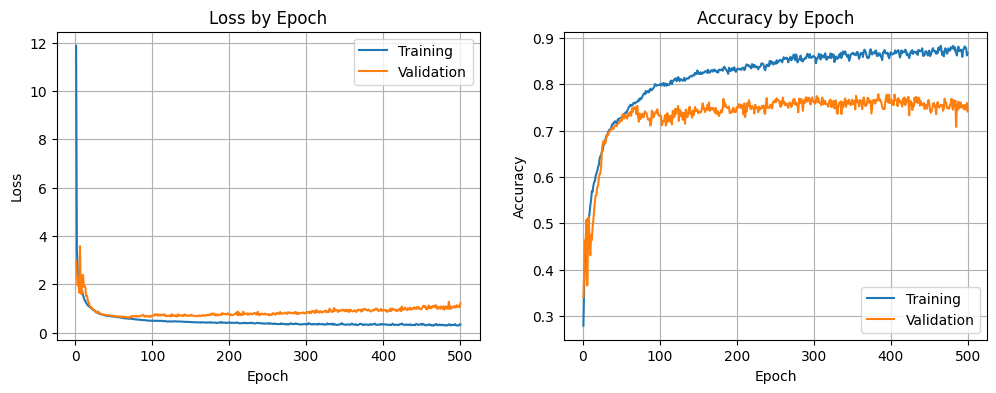

In [ ]:
nnet.training_curves()

# Part 2 - Fashion MNIST (ANN)

In Parts 2 and 3 of this assignment, you will work with the [Fashion MNIST](https://www.kaggle.com/datasets/zalando-research/fashionmnist) dataset. In Part 2, you will build a simple ANN to create a classification model for this dataset. In Part 3, you will build a CNN for this purpose.


## 2.A - Load the Dataset

Use the cell below to load the file `fasion-mnist_train.csv` into a Pandas DataFrame. Then use the `sample()` method to shuffle the DataFrame, setting `random_state=1`. Print the shape of the shuffled DataFrame and then display its head.

In [ ]:
fashion = pd.read_csv('fashion-mnist_train.csv')

fashion = fashion.sample(frac = 1, random_state = 1)

print(fashion.shape)

fashion.head()

(60000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
15281,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21435,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44536,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13518,4,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
47529,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2.B - Create Feature and Label Arrays

This dataset contains 784 numerical features, which represent pixel values for 28x28 black-and-white images. The integer-encoded label indicates the class that each image belongs to.

In the cell below, create a feature array and a label array. The pixel values range from 0 to 255, but your models will learn more easily if these feature values are scaled to be betwen 0 and 1. To that end, please divide the values by 255 when creating the feature array.

Print the shape of each array.

In [ ]:
X = fashion.drop('label', axis = 1).values / 255

y = fashion['label'].values

print(f"Shape of Fashion Feature: {X.shape}", f"\nShape of Fashion Label: {y.shape}")

Shape of Fashion Feature: (60000, 784) 
Shape of Fashion Label: (60000,)


## 2.C - Build and Train the Model

Use `nn.Sequential` to construct a neural network for use with this problem. You can use `Linear` and `ReLu` layers for this part. You can select any architecture you would like, as long as you meet the goal described below. Wrap your network using the `NNet` class provided in the course module.

After creating the model, call the `train_model()` method to train the model on the forest cover data. Set `val_split=0.2` and `seed=1`. Select values the `epoch`, `batch_size`, `lr`, and `updates`, parameters.

To limit the number of lines of ouput displayed to fewer than 100, please select a value for `updates` that is not less than `epochs / 100`.

Your goal is to reach a final validation accuracy of **at least 0.88**. To show that your model is relatively stable, your validation accuracy should be above this threshold for the last several training epochs. Adjust the training parameters until this goal is met.

In [ ]:
model = nn.Sequential(nn.Linear(784, 64),
                      nn.ReLU(),
                      nn.Linear(64, 784),
                      nn.ReLU(),
                      nn.Linear(784, 10)
                     )

epochs =  500
val_split = .2
seed = 1
batch_size = 64
lr = .001
updates = epochs / 100

nnet = NNet(model)

nnet.train_model(X,
                 y,
                 val_split = val_split,
                 seed = seed,
                 epochs = epochs,
                 batch_size = batch_size,
                 lr = lr,
                 updates = updates
                )

Epoch 5: Training loss: 0.3030, Training Acc: 0.8876, Val Loss: 0.3535, Val Acc 0.8750
Epoch 10: Training loss: 0.2357, Training Acc: 0.9111, Val Loss: 0.3499, Val Acc 0.8782
Epoch 15: Training loss: 0.1936, Training Acc: 0.9267, Val Loss: 0.3569, Val Acc 0.8833
Epoch 20: Training loss: 0.1551, Training Acc: 0.9411, Val Loss: 0.4297, Val Acc 0.8756
Epoch 25: Training loss: 0.1318, Training Acc: 0.9500, Val Loss: 0.4863, Val Acc 0.8742
Epoch 30: Training loss: 0.1157, Training Acc: 0.9564, Val Loss: 0.5446, Val Acc 0.8809
Epoch 35: Training loss: 0.0988, Training Acc: 0.9620, Val Loss: 0.6166, Val Acc 0.8722
Epoch 40: Training loss: 0.0873, Training Acc: 0.9661, Val Loss: 0.6885, Val Acc 0.8733
Epoch 45: Training loss: 0.0829, Training Acc: 0.9682, Val Loss: 0.7145, Val Acc 0.8677
Epoch 50: Training loss: 0.0734, Training Acc: 0.9712, Val Loss: 0.7943, Val Acc 0.8740
Epoch 55: Training loss: 0.0701, Training Acc: 0.9731, Val Loss: 0.8391, Val Acc 0.8728
Epoch 60: Training loss: 0.0623, 

## 2.D - Display the Training Curves

Call the `training_curves()` method to display the training curves for your model.

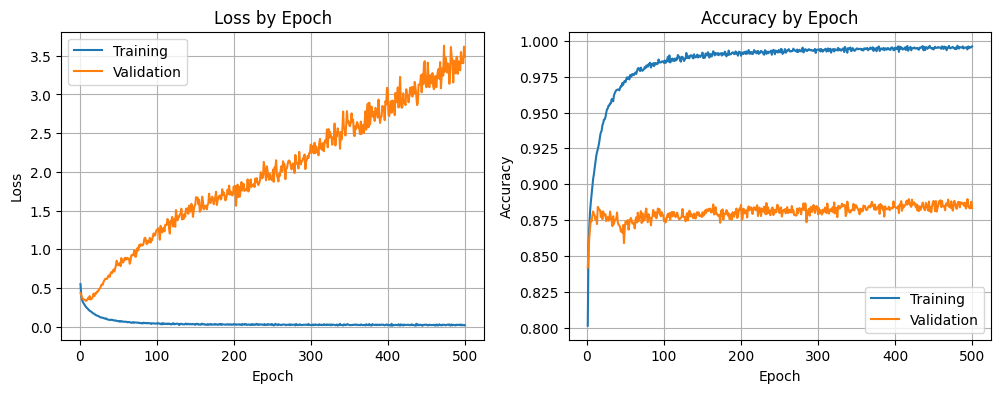

In [ ]:
nnet.training_curves()

# Part 3 - Fashion MNIST (ANN)

In Part 3 of this assignment, you will build a CNN for the [Fashion MNIST](https://www.kaggle.com/datasets/zalando-research/fashionmnist) dataset.


## 3.A - Reshape the Feature Array

Use the `reshape()` array method to reshape the feature array from Part 2 to have shape `(60000, 1, 28, 28)`. In this part, you will reuse the label array from Part 2. You can assign it to a new variable name, if you would like.

Print the shape of the feature array.

In [ ]:
X = X.reshape(60000, 1, 28, 28)

print(f"Reshaped Fashion Feature: {X.shape}")

Reshaped Fashion Feature: (60000, 1, 28, 28)


## 3.B - Build and Train the Model

Use `nn.Sequential` to construct a neural network for use with this problem. You can use `Conv2d`, `MaxPool2d`, `Flatten`, `Linear` and `ReLu` layers for this part. You can select any architecture you would like, as long as you meet the goal described below. Wrap your network using the `NNet` class provided in the course module.

After creating the model, call the `train_model()` method to train the model on the forest cover data. Set `val_split=0.2` and `seed=1`. Select values the `epoch`, `batch_size`, `lr`, and `updates`, parameters.

To limit the number of lines of ouput displayed to fewer than 100, please select a value for `updates` that is not less than `epochs / 100`.

Your goal is to reach a final validation accuracy of **at least 0.91**. To show that your model is relatively stable, your validation accuracy should be above this threshold for the last several training epochs. Adjust the training parameters until this goal is met.

In [ ]:
model = nn.Sequential(nn.Conv2d(1, 32, kernel_size=3, padding=1),
                      nn.ReLU(),
                      nn.MaxPool2d(kernel_size=2, stride=2),
                      nn.Conv2d(32, 64, kernel_size=3, padding=1),
                      nn.ReLU(),
                      nn.MaxPool2d(kernel_size=2, stride=2),
                      nn.Flatten(),
                      nn.Linear(64 * 7 * 7, 128),
                      nn.ReLU(),
                      nn.Linear(128, 10)
                     )

epochs =  500
val_split = .2
seed = 1
batch_size = 64
lr = .001
updates = epochs / 100

nnet = NNet(model)

nnet.train_model(X,
                 y,
                 val_split = val_split,
                 seed = seed,
                 epochs = epochs,
                 batch_size = batch_size,
                 lr = lr,
                 updates = updates
                )

Epoch 5: Training loss: 0.2074, Training Acc: 0.9239, Val Loss: 0.2398, Val Acc 0.9147
Epoch 10: Training loss: 0.1076, Training Acc: 0.9614, Val Loss: 0.2924, Val Acc 0.9075
Epoch 15: Training loss: 0.0562, Training Acc: 0.9801, Val Loss: 0.4697, Val Acc 0.9044
Epoch 20: Training loss: 0.0312, Training Acc: 0.9890, Val Loss: 0.5168, Val Acc 0.9104
Epoch 25: Training loss: 0.0229, Training Acc: 0.9920, Val Loss: 0.6396, Val Acc 0.9077
Epoch 30: Training loss: 0.0198, Training Acc: 0.9930, Val Loss: 0.6659, Val Acc 0.9139
Epoch 35: Training loss: 0.0171, Training Acc: 0.9940, Val Loss: 0.6930, Val Acc 0.9107
Epoch 40: Training loss: 0.0112, Training Acc: 0.9961, Val Loss: 0.7333, Val Acc 0.9098
Epoch 45: Training loss: 0.0114, Training Acc: 0.9960, Val Loss: 0.7733, Val Acc 0.9123
Epoch 50: Training loss: 0.0102, Training Acc: 0.9963, Val Loss: 0.8077, Val Acc 0.9132
Epoch 55: Training loss: 0.0093, Training Acc: 0.9970, Val Loss: 0.9082, Val Acc 0.9083
Epoch 60: Training loss: 0.0083, 

## 3.C - Display the Training Curves

Call the `training_curves()` method to display the training curves for your model.

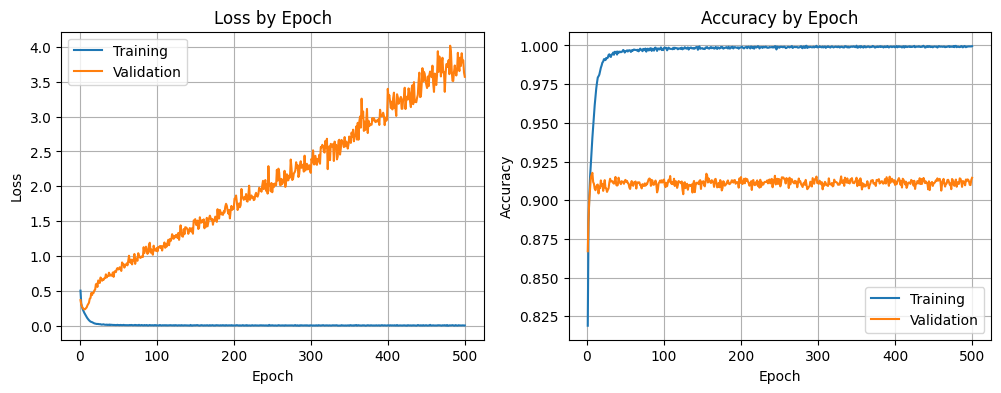

In [ ]:
nnet.training_curves()

# Submission Instructions

1. The cell below will generate an HTML render of your notebook within the same Google Drive folder in which you stored this notebook. Adjust the path for your notebook in the cell below as needed.
2. Restart your notebook and run it from start to finish.
3. If the notebook executes without error, download the HTML export of the notebook and then upload it to Canvas. Make sure to carefully review the contents of the HTML export to ensure that everything is displayed correctly.
4. Click on "Share" in the upper-right corner of this notebook. Then select "Anyone with the link" from dropdown. Click "Copy Link" and paste the copied link as a comment in your submission on Canvas.


In [ ]:
%%capture
time.sleep(30)
!jupyter nbconvert --to html /content/drive/MyDrive/COSC_635/Lab_04_zziauddin1.ipynb